In [25]:
#Import libraries
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

## One Hot Encoding the Target Classes

In [26]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

### Creating 3 Important Lists

In [27]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [28]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"/kaggle/input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [29]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [31]:
result = np.array(result)
result = result.reshape(139,2)

### creating a bar graph for tumor and normal

In [35]:
import matplotlib.pyplot as plt

# Count the number of Tumor and Normal samples
tumor_count = np.sum(result[:, 0] == 1)
normal_count = np.sum(result[:, 1] == 1)

# Create labels and counts for the bar plot
labels = ['Tumor', 'Normal']
counts = [tumor_count, normal_count]

# Example colors that are complementary and visually pleasing
colors = ['skyblue', 'lightcoral']


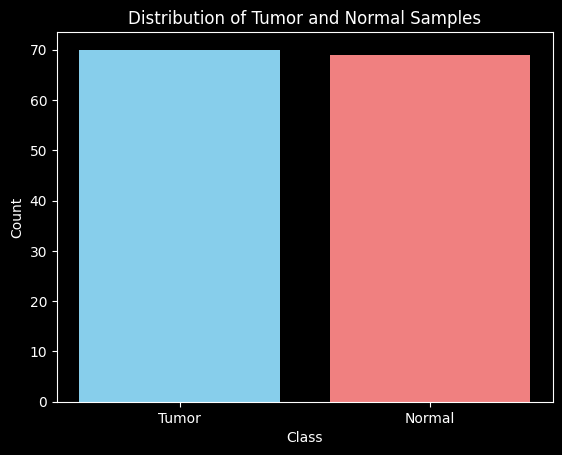

In [36]:
# Create a bar plot
plt.bar(labels, counts, color=colors)
plt.title('Distribution of Tumor and Normal Samples')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Creating a Pie Chart for Tumor and Normal

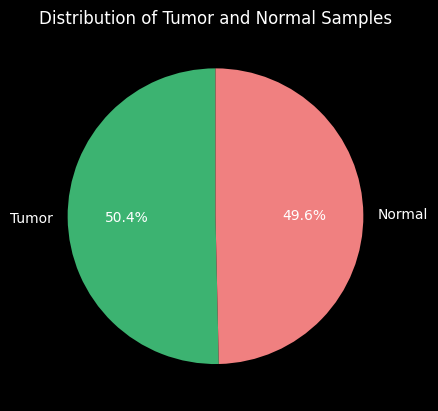

In [38]:
# Calculate percentages
total_samples = len(result)
tumor_percentage = (tumor_count / total_samples) * 100
normal_percentage = (normal_count / total_samples) * 100

# Create labels and counts for the pie chart
labels = ['Tumor', 'Normal']
counts = [tumor_percentage, normal_percentage]
colors = ['mediumseagreen', 'lightcoral']

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Tumor and Normal Samples')
plt.show()

## Splitting the Data into Training & Testing

In [39]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

In [40]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
model.compile(loss="categorical_crossentropy", optimizer="Adamax", metrics=["accuracy"])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)       

In [41]:
y_train.shape

(111, 2)

In [42]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 4s 993ms/step - loss: 24.8259 - accuracy: 0.5586 - val_loss: 24.8785 - val_accuracy: 0.6429
Epoch 2/30
3/3 [==============================] - 3s 911ms/step - loss: 10.7795 - accuracy: 0.7658 - val_loss: 52.9129 - val_accuracy: 0.5357
Epoch 3/30
3/3 [==============================] - 3s 1s/step - loss: 5.2803 - accuracy: 0.8108 - val_loss: 20.1909 - val_accuracy: 0.6071
Epoch 4/30
3/3 [==============================] - 3s 903ms/step - loss: 4.3104 - accuracy: 0.8468 - val_loss: 5.9880 - val_accuracy: 0.7857
Epoch 5/30
3/3 [==============================] - 3s 897ms/step - loss: 2.7308 - accuracy: 0.8198 - val_loss: 8.7455 - val_accuracy: 0.7500
Epoch 6/30
3/3 [==============================] - 3s 926ms/step - loss: 2.8426 - accuracy: 0.8649 - val_loss: 6.9631 - val_accuracy: 0.7857
Epoch 7/30
3/3 [==============================] - 3s 919ms/step - loss: 3.6575 - accuracy: 0.8739 - val_loss: 3.5022 - val_accuracy: 0.7500
Epoch 8/30
3/3 [==

### Accuracy of The Model

In [43]:
#trained model, 'x_test', 'y_test' are test data
evaluation_results = model.evaluate(x_test, y_test)

# 'evaluate' method returns a list of metrics, including accuracy
accuracy = evaluation_results[1]

print("Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

1/1 [==============================] - 0s 163ms/step - loss: 2.0379 - accuracy: 0.8929
Model Accuracy on Test Set: 89.29%


### Plotting Losses

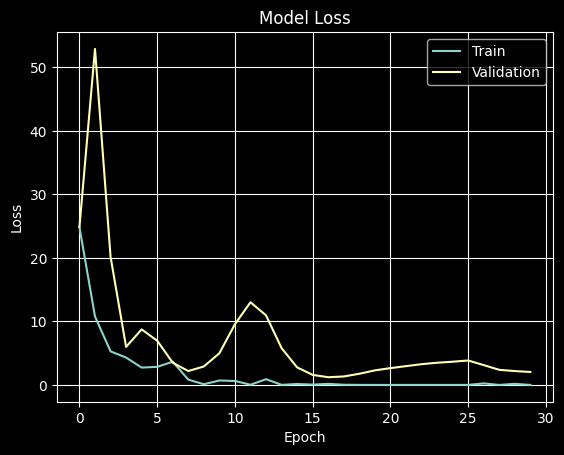

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)  
plt.show()


## Just Checking the Model

In [46]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


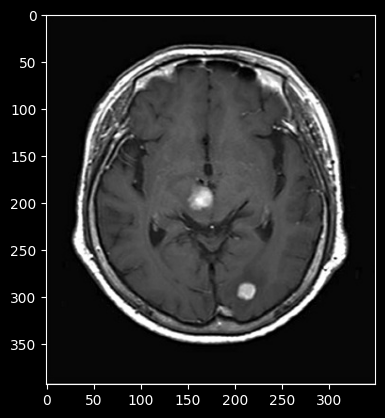

In [47]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A ,Its a Tumor


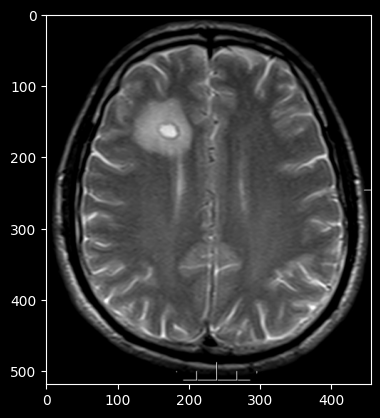

In [51]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ,' + names(classification))

## Accuracy, Precision, recall, and F1 score

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# 'x_test', 'y_test' are test data
y_pred = model.predict(x_test)

# Convert probabilities to class labels 
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

1/1 [==============================] - 0s 161ms/step
Accuracy: 0.8929
Precision: 1.0000
Recall: 0.7857
F1 Score: 0.8800
